# Проект: Прогноз склонности абонентов к выбору тарифного плана

**Оглавление**<a id='toc0_'></a>    
- 1. [Загрузка и изучение данных](#toc1_)    
  - 1.1. [Вывод по разделу 1](#toc1_1_)    
- 2. [Разделение данных на выборки](#toc2_)    
  - 2.1. [Вывод по разделу 2](#toc2_1_)    
- 3. [Исследование моделей](#toc3_)    
  - 3.1. [Исследование моделей типа "дерево решений"](#toc3_1_)    
  - 3.2. [Исследование моделей типа "случайный лес"](#toc3_2_)    
  - 3.3. [Исследование моделей типа "логистическая регрессия"](#toc3_3_)    
  - 3.4. [Вывод по разделу 3](#toc3_4_)    
- 4. [Проверка моделей на тестовой выборке](#toc4_)    
  - 4.1. [Вывод по разделу 4](#toc4_1_)    
- 5. [Проверка моделей на адекватность](#toc5_)    
  - 5.1. [Вывод по разделу 5](#toc5_1_)    
- 6. [Общий вывод](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Задание:**

Оператор мобильной связи «Мегалайн» выяснил, что многие клиенты пользуются архивными тарифами. Он планирует построить систему, способную проанализировать поведение клиентов и предложить пользователям новые тарифы: «Смарт» или «Ультра».

Имеются данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не нужна — она сделана ранее.

Необходимо: построить модель с максимально большим значением *`accuracy`*; довести долю правильных ответов по крайней мере до 0,75; проверить *`accuracy`* на тестовой выборке.

План работы:
1. Загрузка и изучение данных.
2. Разделение данных на выборки.
3. Исследование моделей.
4. Проверка моделей на тестовой выборке.
5. Проверка моделей на адекватность.
6. Общий вывод.

## 1. <a id='toc1_'></a>[Загрузка и изучение данных](#toc0_)

In [1]:
# подключение библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier

In [2]:
# загрузка данных
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except FileNotFoundError:
    data = pd.read_csv('D:/Education/Data_Science/Проекты курса DS/Проект_06/datasets/users_behavior.csv')

# загрузка описаний полей
ind = ['calls', 'minutes', 'messages', 'mb_used', 'is_ultra']
polya = ['количество звонков', 'суммарная длительность звонков в минутах', 'количество sms-сообщений', 
         'израсходованный интернет-трафик в Мб', 'каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)']
opisanie = pd.DataFrame(data=polya, index=ind, columns=['описание'])

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

Количество явных дубликатов: 0


,тип данных,описание
calls,float64,количество звонков
minutes,float64,суммарная длительность звонков в минутах
messages,float64,количество sms-сообщений
mb_used,float64,израсходованный интернет-трафик в Мб
is_ultra,int64,"каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)"



Статистическая информация:


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


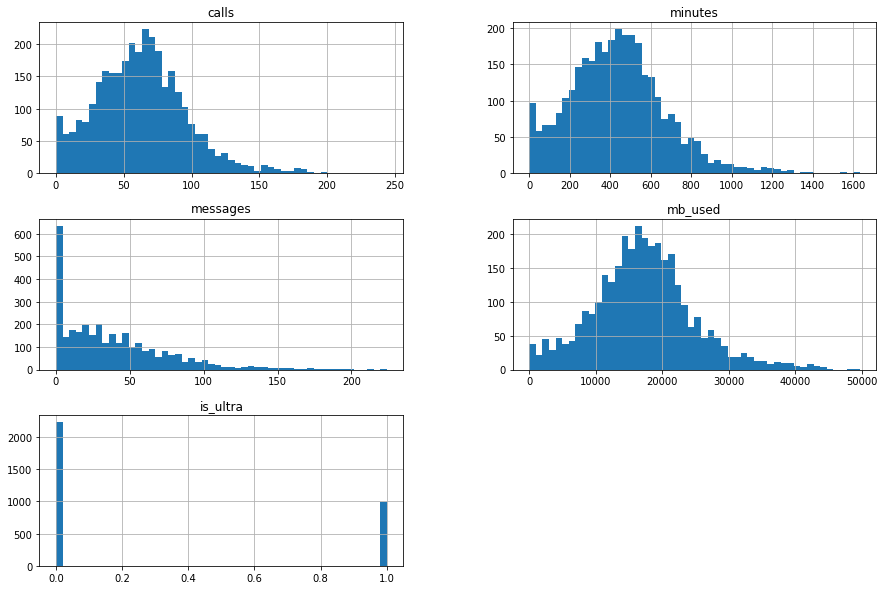

In [3]:
# ознакомимся с данными
display(pd.concat([data.head(), data.tail()]))
data.info()
print('\nКоличество явных дубликатов:', data.duplicated().sum())
pd.set_option('display.max_colwidth', None)
display(data.dtypes.to_frame(name='тип данных').join(opisanie))
print('\nСтатистическая информация:')
display(data.describe())
data.hist(figsize=(15, 10), bins=50)
plt.show()

Можно изменить тип данных для столбцов с количеством звонков и количеством сообщений на целочисленный, а для тарифного плана, имеющего всего два значения, на категориальный.

In [4]:
# изменение типов данных
data['calls'] = data['calls'].astype('Int64')
data['messages'] = data['messages'].astype('Int64')
data['is_ultra'] = data['is_ultra'].astype('category')
# отображение результатов изменений
display(data.dtypes.to_frame(name='type').join(opisanie))

,type,описание
calls,Int64,количество звонков
minutes,float64,суммарная длительность звонков в минутах
messages,Int64,количество sms-сообщений
mb_used,float64,израсходованный интернет-трафик в Мб
is_ultra,category,"каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)"


### 1.1. <a id='toc1_1_'></a>[Вывод по разделу 1](#toc0_)

Данные загружены. Их предобработка была сделана ранее. Названия столбцов унифицированы. Пропусков нет. Дубликатов нет. Аномальных значений не наблюдается. Типы данных соответствуют содержимому.  
- Распределения количества звонков, суммарной длительности звонков и расходуемого интернет-трафика близки к нормальным.  
- Есть всплески на нулевых значениях на графиках распределения количества звонков и минут, значит есть абоненты, которые не звонят. Они или полностью не активные, или пользуются только передачей данных.  
- График распределения количества sms-сообщений имеет большой всплеск в районе нуля. Это говорит о том, что многие пользователи не пользуются sms-сообщениями.  
- Абонентов с тарифным планом "Смарт" в два раза больше, чем абонентов с тарифным планом "Ультра".

## 2. <a id='toc2_'></a>[Разделение данных на выборки](#toc0_)

У нас нет отдельно сохраненной тестовой выборки, поэтому в соответствии с общепринятыми рекомендациями разделим имеющиеся исходные данные на выборки в следующих пропорциях:
- обучающая выборка (60%);
- валидационная выборка (20%);
- тестовая выборка (20%).

Целевая переменная для нашей задачи - это тарифный план, который находится в столбце `is_ultra`.  
В остальных четырех столбцах содержится набор параметров от которых зависит целевая переменная.

In [5]:
# зафиксируем параметр random_state
rst = 12345

# разделим исходные данные на параметры (features) и целевую переменную (target)
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

# разделим исходные данные на обучающую, валидационную и тестовую выборки
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=.4, random_state=rst, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=.5, random_state=rst, stratify=target_valid_test)

# проверим количество строк в сформированных выборках и распределение целевой переменной
print('Обучающая выборка: параметры и целевая переменная (строки, столбцы):', features_train.shape, target_train.shape)
print('Количество строк в разбивке по целевой переменной: {0}. Соотношение: {1}.\n'
      .format(np.bincount(target_train), (np.bincount(target_train)[0] / np.bincount(target_train)[1])))
print('Валидационная выборка: параметры и целевая переменная (строки, столбцы):', features_valid.shape, target_valid.shape)
print('Количество строк в разбивке по целевой переменной: {0}. Соотношение: {1}.\n'
      .format(np.bincount(target_valid), (np.bincount(target_valid)[0] / np.bincount(target_valid)[1])))
print('Тестовая выборка: параметры и целевая переменная (строки, столбцы):', features_test.shape, target_test.shape)
print('Количество строк в разбивке по целевой переменной: {0}. Соотношение: {1}.\n'
      .format(np.bincount(target_test), (np.bincount(target_test)[0] / np.bincount(target_test)[1])))

Обучающая выборка: параметры и целевая переменная (строки, столбцы): (1928, 4) (1928,)
Количество строк в разбивке по целевой переменной: [1337  591]. Соотношение: 2.2622673434856178.

Валидационная выборка: параметры и целевая переменная (строки, столбцы): (643, 4) (643,)
Количество строк в разбивке по целевой переменной: [446 197]. Соотношение: 2.263959390862944.

Тестовая выборка: параметры и целевая переменная (строки, столбцы): (643, 4) (643,)
Количество строк в разбивке по целевой переменной: [446 197]. Соотношение: 2.263959390862944.



### 2.1. <a id='toc2_1_'></a>[Вывод по разделу 2](#toc0_)

Для проведения дальнейшего исследования исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 60%, 20% и 20% соответственно.  
Каждая выборка разделена на массив с параметрами и массив с целевой переменной.

## 3. <a id='toc3_'></a>[Исследование моделей](#toc0_)

В нашем исследовании мы решаем задачу классификации, так как целевым признаком является тариф. Этот признак категориальный, имеет два варианта значения "Смарт" (0) и "Ультра" (1).  
Будем создавать, обучать и исследовать три типа моделей:
- дерево решений (DecisionTreeClassifier);
- случайный лес (RandomForestClassifier);
- логистическая регрессия (LogisticRegression).

Цель - найти модель, предсказывающую тариф на валидационной выборке с точностью `accuracy` не менее 0,75, изменяя доступные гиперпараметры моделей.

### 3.1. <a id='toc3_1_'></a>[Исследование моделей типа "дерево решений"](#toc0_)

Определим лучшую по точности модель типа "дерево решений", изменяя глубину дерева от 1 до 10.

In [6]:
best_accuracy_dct = 0
best_depth_dct = 0
best_model_dtc = None
for depth in range(1, 11):
    # создаем модель типа "дерево решений" с глубиной 'depth'
    model = DecisionTreeClassifier(random_state=rst, max_depth=depth)
    # обучаем модель на обучающей выборке
    model.fit(features_train, target_train)
    # получаем предсказания обученной модели на валидационной выборке
    predictions = model.predict(features_valid)
    # определяем точность модели
    accuracy = accuracy_score(target_valid, predictions)
    if accuracy > best_accuracy_dct:
        best_accuracy_dct = accuracy
        best_depth_dct = depth
        best_model_dtc = model
        
print('Лучшая точность у модели типа "дерево решений" составляет {0} при глубине дерева {1}.'
      .format(best_accuracy_dct, best_depth_dct))

Лучшая точность у модели типа "дерево решений" составляет 0.80248833592535 при глубине дерева 8.


### 3.2. <a id='toc3_2_'></a>[Исследование моделей типа "случайный лес"](#toc0_)

Определим лучшую по точности модель типа "случайный лес", изменяя количество деревьев от 10 до 100 с шагом 10 и глубину дерева от 1 до 10.

In [7]:
best_accuracy_rfc = 0
best_depth_rfc = 0
best_est_rfc = 0
best_model_rfc = None
for est in range(10, 101, 10):
    for depth in range (1, 11):
        # создаем модель типа "случайный лес" с количеством деревьев 'est' и глубиной 'depth'
        model = RandomForestClassifier(random_state=rst, n_estimators=est, max_depth=depth)
        # обучаем модель на обучающей выборке
        model.fit(features_train, target_train)
        # получаем предсказания обученной модели на валидационной выборке
        predictions = model.predict(features_valid)
        # определяем точность модели
        accuracy = accuracy_score(target_valid, predictions)
        if accuracy > best_accuracy_rfc:
            best_accuracy_rfc = accuracy
            best_depth_rfc = depth
            best_est_rfc = est
            best_model_rfc = model
            
print('Лучшая точность у модели типа "случайный лес" составляет {0} при {1} деревьях с глубиной дерева {2}.'
      .format(best_accuracy_rfc, best_est_rfc, best_depth_rfc))

Лучшая точность у модели типа "случайный лес" составляет 0.8211508553654744 при 40 деревьях с глубиной дерева 9.


### 3.3. <a id='toc3_3_'></a>[Исследование моделей типа "логистическая регрессия"](#toc0_)

Определим лучшую по точности модель типа "логистическая регрессия", изменяя количество итераций от 100 до 1000 с шагом 10.

In [8]:
best_accuracy_lr = 0
best_iter_lr = 0
best_model_lr = None
for iter in range(100, 1001, 10):
    # создаем модель типа "логистическая регрессия" с количеством итераций 'iter'
    model = LogisticRegression(random_state=rst, solver='lbfgs', max_iter=iter)
    # обучаем модель на обучающей выборке
    model.fit(features_train, target_train)
    # получаем предсказания обученной модели на валидационной выборке
    predictions = model.predict(features_valid)
    # определяем точность модели
    accuracy = accuracy_score(target_valid, predictions)
    if accuracy > best_accuracy_lr:
        best_accuracy_lr = accuracy
        best_iter_lr = iter
        best_model_lr = model
        
print('Лучшая точность у модели типа "логистическая регрессия" составляет {0} при количестве итераций {1}.'
      .format(best_accuracy_lr, best_iter_lr))

Лучшая точность у модели типа "логистическая регрессия" составляет 0.7387247278382582 при количестве итераций 100.


### 3.4. <a id='toc3_4_'></a>[Вывод по разделу 3](#toc0_)

Наибольшую точность (0,82) на валидационной выборке дает модель типа "случайный лес" при 40 деревьях с глубиной дерева 9.

Точность `accuracy` лучше 0,75 дают модели типов "случайный лес" и "решающее дерево".  
Модель типа "логистическая регрессия" дает точность хуже 0,75.

## 4. <a id='toc4_'></a>[Проверка моделей на тестовой выборке](#toc0_)

Проверим точность лучших из каждого типа моделей на тестовой выборке.

In [9]:
# получим предсказания обученной модели типа "решающее дерево" на тестовой выборке
predictions = best_model_dtc.predict(features_test)
# определяем точность модели на тестовой выборке
accuracy_dct_test = accuracy_score(target_test, predictions)
print('Точность лучшей из моделей типа "решающее дерево" на тестовой выборке составляет {}.'.format(accuracy_dct_test))

# получим предсказания обученной модели типа "случайный лес" на тестовой выборке
predictions = best_model_rfc.predict(features_test)
# определяем точность модели на тестовой выборке
accuracy_rfc_test = accuracy_score(target_test, predictions)
print('Точность лучшей из моделей типа "случайный лес" на тестовой выборке составляет {}.'.format(accuracy_rfc_test))

# получим предсказания обученной модели типа "логистическая регрессия" на тестовой выборке
predictions = best_model_lr.predict(features_test)
# определим точность модели на тестовой выборке
accuracy_lr_test = accuracy_score(target_test, predictions)
print('Точность лучшей из моделей типа "логистическая регрессия" на тестовой выборке составляет {}.'.format(accuracy_lr_test))

Точность лучшей из моделей типа "решающее дерево" на тестовой выборке составляет 0.7838258164852255.
Точность лучшей из моделей типа "случайный лес" на тестовой выборке составляет 0.8087091757387247.
Точность лучшей из моделей типа "логистическая регрессия" на тестовой выборке составляет 0.7465007776049767.


Добавим валидационную выборку к обучающей и на увеличенном объеме данных проведем обучение полученных ранее трех лучших моделей разных типов. После этого проведем их повторное тестирование на тестовой выборке.

In [10]:
# объединим обучающую и валидационную выборки
features_train_full = pd.concat([features_train, features_valid])
target_train_full = pd.concat([target_train, target_valid])

# проверим количество строк в объединенной обучающей выборке и распределение целевой переменной
print('Объединенная обучающая выборка: параметры и целевая переменная (строки, столбцы):', 
      features_train_full.shape, target_train_full.shape)
print('Количество строк в разбивке по целевой переменной: {0}. Соотношение: {1}.\n'
      .format(np.bincount(target_train_full), (np.bincount(target_train_full)[0] / np.bincount(target_train_full)[1])))

Объединенная обучающая выборка: параметры и целевая переменная (строки, столбцы): (2571, 4) (2571,)
Количество строк в разбивке по целевой переменной: [1783  788]. Соотношение: 2.262690355329949.



In [11]:
# обучим три лучшие выборки на объединенной обучающей выборке
best_model_dtc.fit(features_train_full, target_train_full)
best_model_rfc.fit(features_train_full, target_train_full)
best_model_lr.fit(features_train_full, target_train_full)

# получим предсказания обученной модели типа "решающее дерево" на тестовой выборке
predictions = best_model_dtc.predict(features_test)
# определяем точность модели на тестовой выборке
accuracy_dct_test = accuracy_score(target_test, predictions)
print('Точность модели типа "решающее дерево" на тестовой выборке составляет {}.'.format(accuracy_dct_test))

# получим предсказания обученной модели типа "случайный лес" на тестовой выборке
predictions = best_model_rfc.predict(features_test)
# определим точность модели на тестовой выборке
accuracy_rfc_test = accuracy_score(target_test, predictions)
print('Точность модели типа "случайный лес" на тестовой выборке составляет {}.'.format(accuracy_rfc_test))

# получим предсказания обученной модели типа "логистическая регрессия" на тестовой выборке
predictions = best_model_lr.predict(features_test)
# определим точность модели на тестовой выборке
accuracy_lr_test = accuracy_score(target_test, predictions)
print('Точность модели типа "логистическая регрессия" на тестовой выборке составляет {}.'.format(accuracy_lr_test))

Точность модели типа "решающее дерево" на тестовой выборке составляет 0.807153965785381.
Точность модели типа "случайный лес" на тестовой выборке составляет 0.8289269051321928.
Точность модели типа "логистическая регрессия" на тестовой выборке составляет 0.7480559875583204.


После обучения на объединенной выборке (обучающая+валидационная), точность на тестовой выборке всех моделей увеличилась. В большей степени улучшение произошло для моделей типа "решающее дерево" и "случайный лес", в меньшей степени для модели типа "логистическая регрессия".  
Точность модели типа "логистическая регрессия" осталась ниже порогового значения 0,75.

### 4.1. <a id='toc4_1_'></a>[Вывод по разделу 4](#toc0_)

Точность моделей типа "решающее дерево" и "случайный лес" на тестовой выборке не существенно, но ниже, чем на валидационной. Точность модели типа "логистическая регрессия" на тестовой выборке немного выше, чем на валидационной.  
Наибольшая точность у модели типа "случайный лес", наименьшая - у модели типа "логистическая регрессия".  
Точность всех моделей на тестовой выборке удалось поднять за счет обучения моделей на объединенной обучающей выборке (обучающая+валидационная).
Точность `accuracy` моделей типа "случайный лес" и "решающее дерево" лучше 0,75. Точность модели типа "логистическая регрессия" хуже 0,75.

## 5. <a id='toc5_'></a>[Проверка моделей на адекватность](#toc0_)

Для проверки адекватности созданных моделей создадим и оценим точность модели, созданной по простейшим правилам с помощью функции `DummyClassifier`. Метод создания модели - всегда предсказывать наиболее часто встречающийся в обучающей выборке класс.

In [12]:
# создадим простую модель
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=rst)
# обучаем модель на обучающей выборке
dummy_clf.fit(features_train, target_train)
# получаем предсказания обученной модели на тестовой выборке
predictions = dummy_clf.predict(features_test)
# определяем точность модели
accuracy = accuracy_score(target_test, predictions)
print('Точность модели на тестовой выборке составляет {}.'.format(accuracy))

Точность модели на тестовой выборке составляет 0.6936236391912908.


### 5.1. <a id='toc5_1_'></a>[Вывод по разделу 5](#toc0_)

Точность всех трех моделей ("решающее дерево", "случайный лес" и "логистическая регрессия") на тестовой выборке выше точности модели, созданной по простейшим правилам, значит все три модели можно считать адекватными.

## 6. <a id='toc6_'></a>[Общий вывод](#toc0_)

Данные, используемые для исследования, были подготовлены ранее. Проверка показала их пригодность для исследования без необходимости применения дополнительной предобработки. Небольшие корректировки были внесены в типы данных.

Для проведения исследования исходные данные были разделены на обучающую, валидационную и тестовую выборки в соотношении 60%, 20% и 20% соответственно. Каждая выборка в свою очередь была разделена на массив с параметрами и массив с целевой переменной.

Создавались, обучались и исследовались три типа моделей:
- "дерево решений" (DecisionTreeClassifier);
- "случайный лес" (RandomForestClassifier);
- "логистическая регрессия" (LogisticRegression).

Улучшение точности моделей осуществлялось регулировкой гиперпараметров: глубина дерева, количество деревьев, количество итераций.

Заданную точность `accuracy` > 0,75 смогли обеспечить модели "решающее дерево" и "случайный лес". При этом наибольшую точность (0,82) на валидационной выборке показала модель типа "случайный лес" при установке значений гиперпараметров: 40 деревьев с глубиной 9 узлов.  
Модель типа "логистическая регрессия" показала точность хуже 0,75.

На тестовой выборке модели типа "решающее дерево" и "случайный лес" показали чуть меньшую точность, чем на валидационной, но выше порога в 0,75. Точность модели типа "логистическая регрессия" на тестовой выборке выше, чем на валидационной, но остается ниже порогового значения 0,75.

Точность всех моделей на тестовой выборке удалось поднять за счет обучения моделей на увеличенной объединенной обучающей выборке (обучающая+валидационная). Но даже за счет этого точность `accuracy` модели типа "логистическая регрессия" не удалось поднять выше 0,75. Точность моделей типа "случайный лес" и "решающее дерево" выше 0,75 и составляет 0,83 и 0,81 соответственно.

Адекватность моделей оценивалась в сравнении с моделью, построенной с помощью функции `DummyClassifier`, методом предсказания наиболее часто встречающегося класса. Все три исследуемые модели имеют более высокую точность, чем модель `DummyClassifier`, и могут считаться адекватными.